In [4]:
import matplotlib.pyplot as plt  #导入matplotlib库
import numpy as np  #导入numpy库

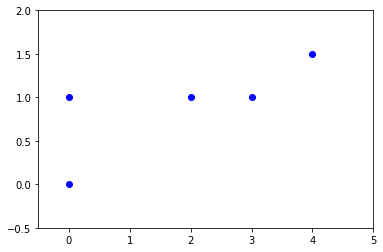

In [18]:
''''' 一个简单案例'''  
x = [0,0,2,3,4]
y =[1,0,1,1,1.5]
plt.xlim(-0.5,5)
plt.ylim(-0.5, 2)
plt.scatter(x,y, c='b')

(-0.5, 2)

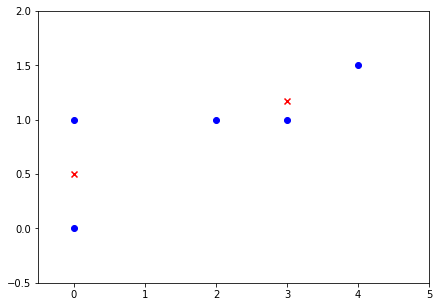

In [21]:
''''' 最终聚类结果'''  
fig, ax = plt.subplots(figsize=(7,5))  #创建子图，大小为7*5
x1 = [0,0,2,3,4]
y1 =[1,0,1,1,1.5]
x2 = [0, 3]
y2 =[0.5, 1.17]

ax.scatter(x1, y1, c='b', marker='o')
ax.scatter(x2, y2, c='r', marker='x')
plt.xlim(-0.5,5)
plt.ylim(-0.5, 2)

In [1]:
''''' K均值聚类'''
import pandas as pd  #导入pandas库
import matplotlib.pyplot as plt  #导入matplotlib库
import numpy as np  #导入numpy库

In [27]:
df = pd.read_csv(''..//z_data//11_beverage.csv') #读取csv数据
df.head()  #展示前五行数据

,juice,sweet
0,2.1041,0.8901
1,-1.0617,-0.4111
2,0.3521,-1.7488
3,-0.1962,2.5952
4,1.4158,1.0928


In [28]:
X = df.iloc[:,0:2]  #取df的2列为X变量

X = np.array(X.values)  # 把X化为数组形式

In [80]:
X.shape

(59L, 2L)

Text(0,0.5,u'sweet')

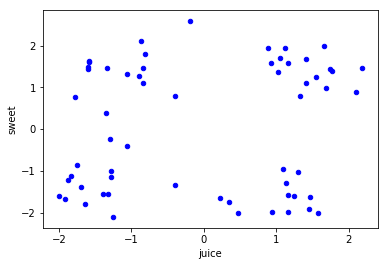

In [30]:
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o', c='b')
# 设置坐标轴的lable
plt.xlabel('juice')
plt.ylabel('sweet')

In [87]:
from sklearn.cluster import KMeans #导入kmeans算法库
n_clusters=3  #设置聚类结果的类簇
kmean = KMeans(n_clusters) #设定算法为KMeans算法
kmean.fit(X)  #进行聚类算法训练

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
from sklearn import metrics  #导入metrics评估模块
y_pred = kmean.predict(X)  #根据聚类结果预测每个X所对应的类簇
metrics.calinski_harabaz_score(X, y_pred)  #采用CH指标评估聚类结果

73.95986749645601

In [83]:
labels = kmean.labels_  #输出每一样本的聚类的类簇标签
centers = kmean.cluster_centers_  #输出聚类的类簇中心点

In [84]:
print '各类簇标签值：', labels
print '各类簇中心：', centers

各类簇标签值： [0 1 1 2 0 1 1 0 2 2 1 1 0 2 1 1 1 1 0 2 1 1 0 1 0 2 1 1 0 2 1 1 0 2 0 1 1
 2 0 1 0 2 0 2 1 1 0 2 1 2 1 1 0 2 1 1 1 0 2]
各类簇中心： [[ 1.44084375  1.44255625]
 [-0.30035357 -1.44121786]
 [-1.11652     1.4173    ]]


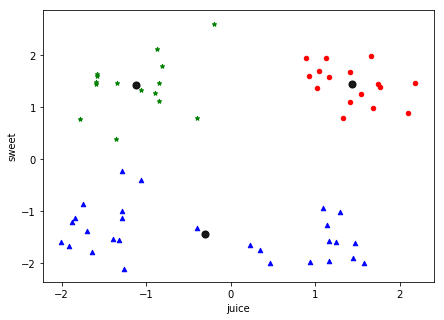

In [88]:
markers = ['o', '^', '*']  #设置散点图标记列表
colors = ['r', 'b', 'g']  #设置散点图颜色列表
plt.figure(figsize=(7, 5)) #设置图形大小
# 画每个类簇的样本点
for c in range(n_clusters):
    cluster = X[labels == c]  #根据不同分类值c筛选X
    #按照c的不同取值选取相应样本点、标记、颜色，画散点图
    plt.scatter(cluster[:, 0], cluster[:, 1], marker=markers[c], s=20, c=colors[c])
# 画出每个类簇中心点
plt.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="black", alpha=0.9, s=50)
# 设置坐标轴的label
plt.xlabel('juice')
plt.ylabel('sweet')
plt.show()  #展示图形

In [89]:
n_clusters_four=4  #设置聚类结果的类簇为4
kmean_four = KMeans(n_clusters_four) #设定算法为KMeans算法
kmean_four.fit(X) #进行聚类算法训练

y_pred_four = kmean_four.predict(X) #根据聚类结果预测每个X所对应的类簇
metrics.calinski_harabaz_score(X, y_pred_four)  #采用CH指标评估聚类结果

188.0667309404243

In [90]:
labels_four = kmean_four.labels_ #输出每一样本的聚类的类簇标签
centers_four = kmean_four.cluster_centers_ #输出聚类的类簇中心点
print '各类簇中心：', centers_four

各类簇中心： [[ 1.04653846 -1.64170769]
 [ 1.44084375  1.44255625]
 [-1.46766    -1.26746   ]
 [-1.11652     1.4173    ]]


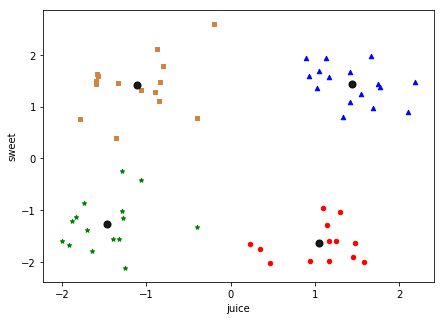

In [91]:
markers = ['o', '^', '*', 's']  #设置散点图标记列表
colors = ['r', 'b', 'g', 'peru']  #设置散点图颜色列表
plt.figure(figsize=(7, 5)) #设置图形大小
# 画每个类簇的样本点
for c in range(n_clusters_four):
    cluster = X[labels_four == c]  #根据不同分类值c筛选X
    #按照c的不同取值选取相应样本点、标记、颜色，画散点图
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                marker=markers[c], s=20, c=colors[c])
# 画出每个类簇中心点
plt.scatter(centers_four[:, 0], centers_four[:, 1],
            marker='o', c="black", alpha=0.9, s=50)
# 设置坐标轴的label
plt.xlabel('juice')
plt.ylabel('sweet')
plt.show()  #展示图形

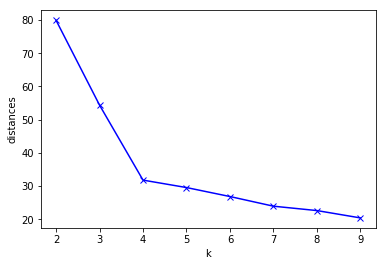

In [77]:
from scipy.spatial.distance import cdist
#类簇的数量2到9
clusters = range(2, 10) 
#距离函数
distances_sum = []
 
for k in clusters:
    kmeans_model = KMeans(n_clusters = k).fit(X) #对不同取值k进行训练
    #计算各对象离各类簇中心的欧氏距离，生成距离表
    distances_point = cdist(X, kmeans_model.cluster_centers_, 'euclidean')
    #提取每个对象到其类簇中心的距离（该距离最短，所以用min函数），并相加。
    distances_cluster = sum(np.min(distances_point,axis=1))
    #依次存入range(2, 10)的距离结果
    distances_sum.append(distances_cluster)
 
 
plt.plot(clusters, distances_sum, 'bx-')  #画出不同聚类结果下的距离总和
# 设置坐标轴的label
plt.xlabel('k')  
plt.ylabel('distances')
plt.show()  #展示图形